# Descriptive Analysis using python

In [4]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df=pd.read_csv("DS1_C4_S5_Salary_Data_Concept.csv")
df

,Intel,Microsoft,Adobe
0,125,159,142
1,144,188,106
2,115,125,130
3,137,164,119
4,128,97,82
5,121,221,122
6,126,244,135
7,118,268,82
8,116,149,101
9,112,203,131


# Demo central Tendency

# Calculating Mean,Median and Mode

In [8]:
df.head()

,Intel,Microsoft,Adobe
0,125,159,142
1,144,188,106
2,115,125,130
3,137,164,119
4,128,97,82


In [9]:
mean=[]
median=[]
mode=[]
for col in df.columns:
    mean.append(st.mean(df[col]))
    median.append(st.median(df[col]))
    mode.append(st.mode(df[col]))

In [10]:
mean,median,mode

([122.92, 171.8, 114.2], [121, 159, 119], [112, 203, 82])

In [11]:
df.columns

Index(['Intel', 'Microsoft', 'Adobe'], dtype='object')

In [12]:
df.columns.tolist()

['Intel', 'Microsoft', 'Adobe']

In [13]:
row_head=["Mean","Median","Mode"]
col_head=df.columns.tolist()

ct_df=pd.DataFrame([mean,median,mode],index=row_head,columns=col_head)
ct_df

,Intel,Microsoft,Adobe
Mean,122.92,171.8,114.2
Median,121.00,159.0,119.0
Mode,112.00,203.0,82.0


# Calculation of Standard variation and Coefficent of variance

In [15]:
sd=[]
cv=[]

for col in df.columns:
    sd.append(st.stdev(df[col]))
    cv.append((st.stdev(df[col])/st.mean(df[col]))*100)

In [16]:
sd,cv

([16.87187008010671, 49.903239707791855, 19.276496915501358],
 [13.725894956155802, 29.04728737356918, 16.87959449693639])

# Calculation of Range ,inter Quartile Range and Q1,Q2,Q3

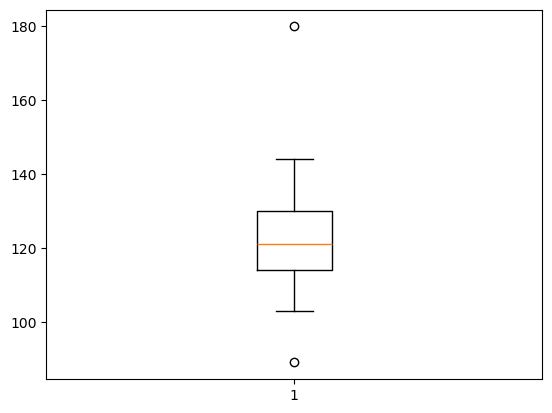

In [18]:
plt.boxplot(df['Intel'])
plt.show()

In [19]:
for col in df.columns:
    LO=[]#Lower Outliers
    UO=[]#Upper Ouliers

    ser=pd.Series(df[col])

    min=ser.min()
    max=ser.max()

    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)

    iqr=q3-q1

    UF=q3+(1.5*iqr) #Upper Fence
    LF=q1-(1.5*iqr) #Lower Fence

    for val in ser:
        if val> UF:
            UO.append(val)
        elif val<LF:
            LO.append(val)

    if col=="Intel":
        Intel=["Intel",min,max,q1,q3,iqr,UF,LF,UO,LO]
    elif col=="Microsoft":
        Microsoft=["Microsoft",min,max,q1,q3,iqr,UF,LF,UO,LO]
    elif col=="Adobe":
        Adobe=["Adobe",min,max,q1,q3,iqr,UF,LF,UO,LO]

col_head=["Company_Name","min","max","q1","q3","iqr","UF","LF","UO","LO"]
range_df=pd.DataFrame([Intel,Microsoft,Adobe],columns=col_head)
range_df

,Company_Name,min,max,q1,q3,iqr,UF,LF,UO,LO
0,Intel,89,180,114.0,130.0,16.0,154.0,90.0,[180],[89]
1,Microsoft,97,300,138.0,200.0,62.0,293.0,45.0,[300],[]
2,Adobe,76,146,101.0,129.0,28.0,171.0,59.0,[],[]


In [20]:
pd.Series(df["Intel"]).min()

89

In [62]:
df['Intel'].mean()

122.92

In [64]:
df['Intel'].quantile(0.60)

125.4

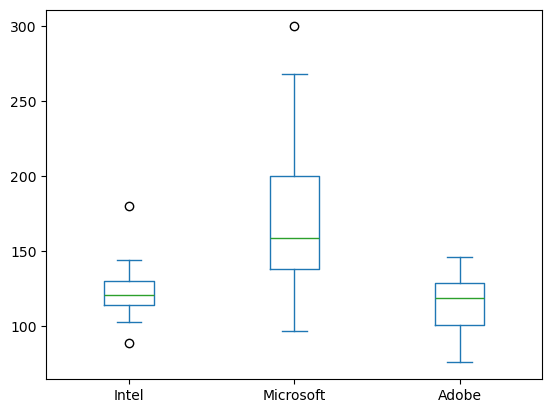

In [21]:
df[['Intel','Microsoft','Adobe']].plot.box()
plt.show()

# Data Visualization of spread of data

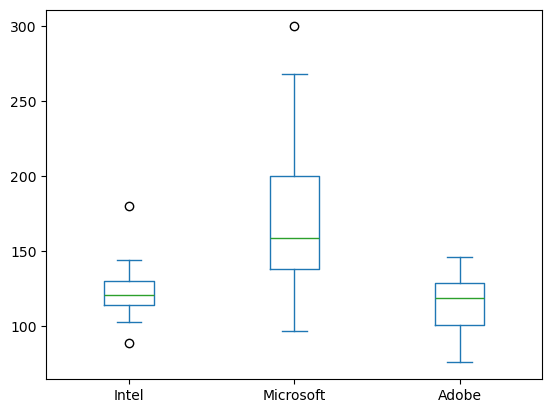

In [23]:
# Box Plot
df[['Intel','Microsoft','Adobe']].plot.box()
plt.show()

C:\Users\boomi\AppData\Local\Temp\ipykernel_7976\3441534450.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Intel'],kde=True)
C:\Users\boomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


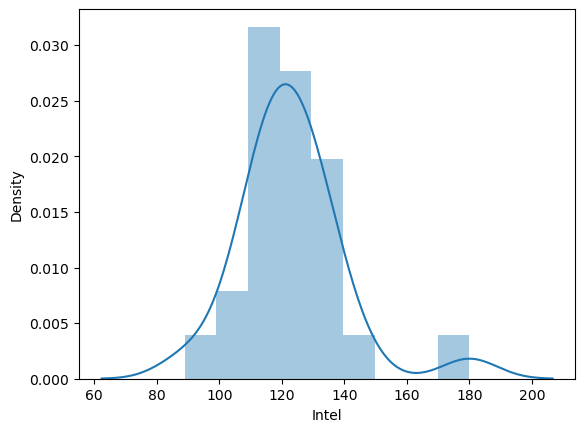

In [24]:
# Displot
sb.distplot(df['Intel'],kde=True)
plt.show()

# Distribution curve and Kurtosis Calculation

In [26]:
from scipy.stats import norm,kurtosis

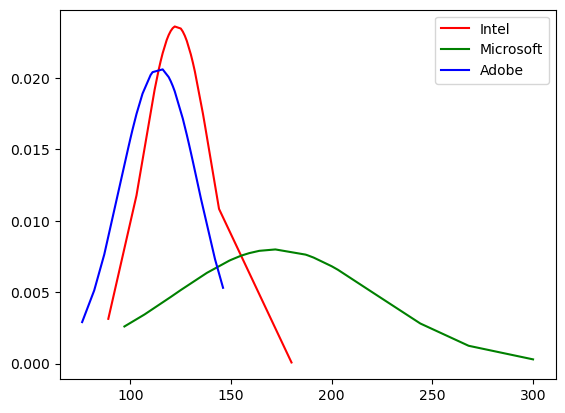

In [27]:
# Sorting the individual data

intel_data=sorted(df["Intel"])
microsoft_data=sorted(df["Microsoft"])
adobe_data=sorted(df["Adobe"])

i_mean=st.mean(intel_data)
i_std=st.stdev(intel_data)

m_mean=st.mean(microsoft_data)
m_std=st.stdev(microsoft_data)

a_mean=st.mean(adobe_data)
a_std=st.stdev(adobe_data)

plt.plot(intel_data,norm.pdf(intel_data,i_mean,i_std),color="red",label="Intel")
plt.plot(microsoft_data,norm.pdf(microsoft_data,m_mean,m_std),color="green",label="Microsoft")
plt.plot(adobe_data,norm.pdf(adobe_data,a_mean,a_std),color="blue",label="Adobe")

plt.legend()
plt.show()

In [28]:
print("Kurtosis of Intel Salary is",kurtosis(intel_data))
print("Kurtosis of Microsoft Salary is",kurtosis(microsoft_data))
print("Kurtosis of Adobe Salary is",kurtosis(adobe_data))

Kurtosis of Intel Salary is 3.728350010893812
Kurtosis of Microsoft Salary is 0.2677156774812355
Kurtosis of Adobe Salary is -0.7502404479556861


# Creating and Visualizing Correlation:

In [30]:
df1=pd.read_csv("DS1_C4_S5_Mtcars_Data_Concept.csv")
df1

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


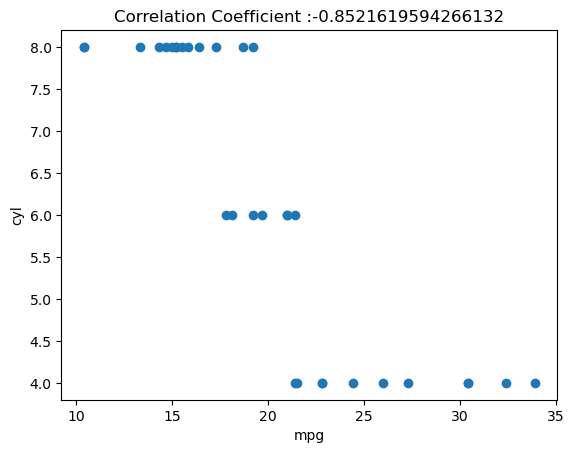

In [31]:
c_v=df1['mpg'].corr(df1['cyl'])

plt.scatter(df1['mpg'],df1['cyl'])
plt.xlabel('mpg')
plt.ylabel('cyl')
plt.title('Correlation Coefficient :'+str(c_v))
plt.show()

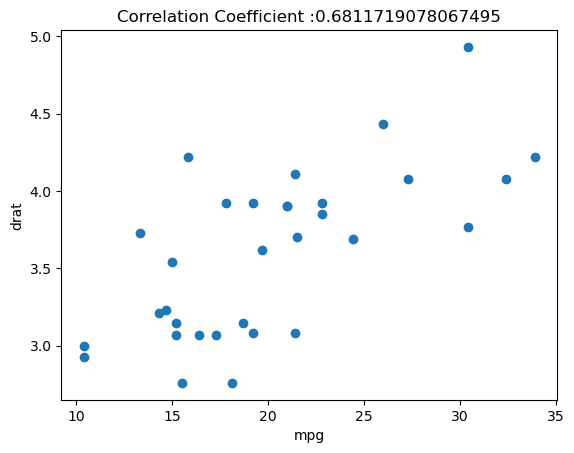

In [32]:
c_v=df1['mpg'].corr(df1['drat'])

plt.scatter(df1['mpg'],df1['drat'])
plt.xlabel('mpg')
plt.ylabel('drat')
plt.title('Correlation Coefficient :'+str(c_v))
plt.show()

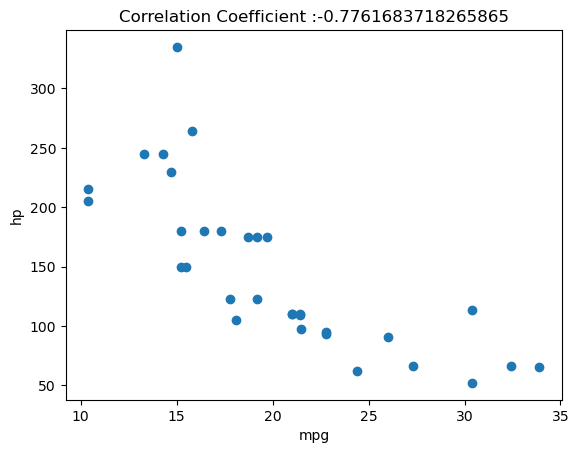

In [33]:
c_v=df1['mpg'].corr(df1['hp'])

plt.scatter(df1['mpg'],df1['hp'])
plt.xlabel('mpg')
plt.ylabel('hp')
plt.title('Correlation Coefficient :'+str(c_v))
plt.show()

In [34]:
df2=df1.drop(columns=['model'])
df2

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


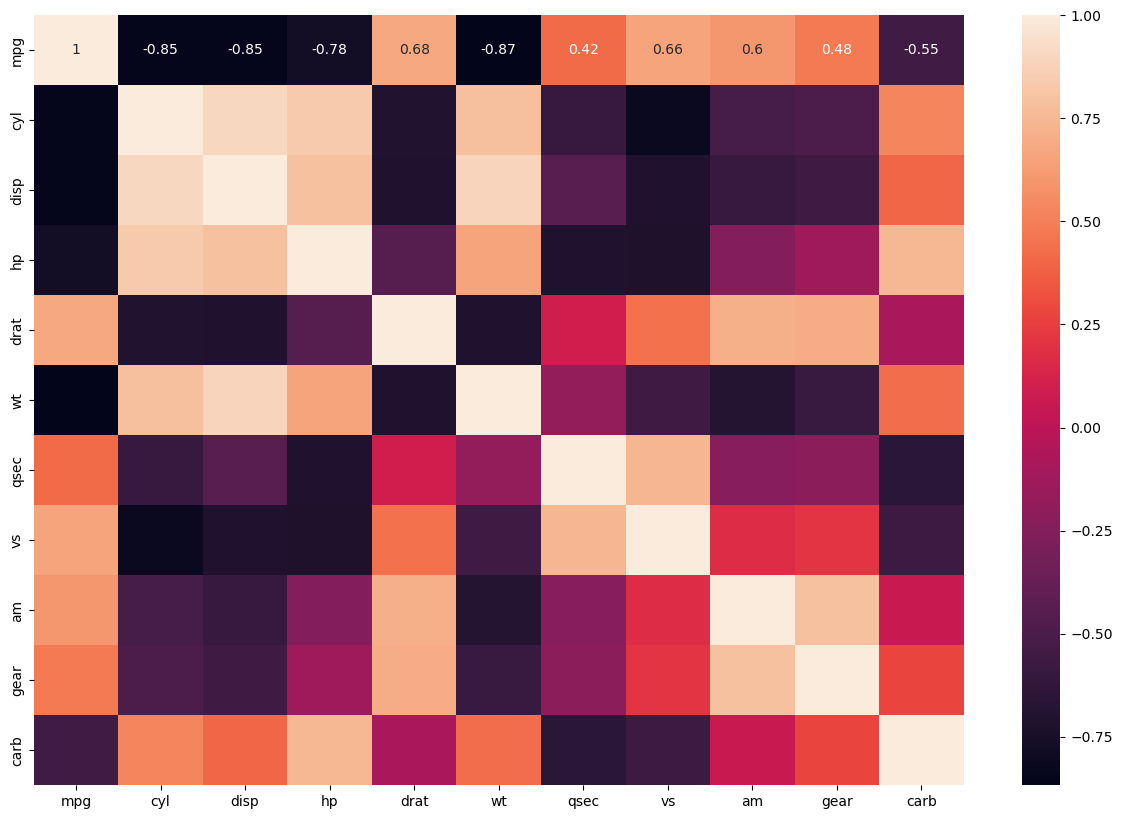

In [35]:
plt.figure(figsize=(15,10))
sb.heatmap(df2.corr(),annot=True)
plt.show()